# COMP5318 - Machine Learning and Data Mining 

## Tutorial 3 - Probability

**Semester 2, 2020**

**Objectives:**

* To understand continuous and discrete random variables.
* To become familiar with random samples.
* To become familiar with metrics in Information Theory.


**Instructions:**
* Exercises to be completed on IPython notebook such as: 
   * Ipython 3 (Jupyter) notebook installed on your computer http://jupyter.org/install (you need to have Python installed first https://docs.python.org/3/using/index.html )
   * Web-based Ipython notebooks such as Google Colaboratory https://colab.research.google.com/ 
   
* If you are using Jupyter intalled on your computer, Go to File->Open. Drag and drop "lab3.ipynb" file to the home interface and click upload. 
* If you are using Google Colaboratory, Click File->Upload notebook, and and upload "lab3.ipynb" file
* Complete exercises in "lab3.ipynb".
* To run the cell you can press Ctrl-Enter or hit the Play button at the top.
* Complete all exercises marked with **TODO**.
* Save your file when you are done with the exercises, so you can show your tutor next week.

Lecturers: Nguyen Hoang Tran 

Tutors: Canh Dinh, Chen Chen, Claire Hardgrove, Fengxiang He, Henry Weld, Yixuan Zhang, Zhiyi Wang, Thomas Selvaraj.

# 1 Probability Distributions

## 1.1 Continuous random variables

Some of the methods in scipy.stats library for random variables include,
* rvs: Random Variates
* pdf/pmf: Probability Density/Mass Function
* cdf: Cumulative Distribution Function
* stats: Return mean, variance, (Fisher’s) skew, or (Fisher’s) kurtosis
* moment: non-central moments of the distribution

In [ ]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

from scipy import stats as st

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


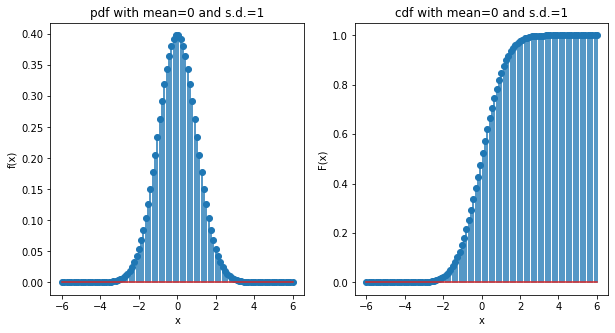

In [ ]:
mean, sd = 0, 1
x = np.linspace(mean - 6*sd, mean + 6*sd, 100)
f = st.norm.pdf(x=x, loc=mean, scale=sd)
F = st.norm.cdf(x=x, loc=mean, scale=sd)

pl.figure(figsize=(10,5))
pl.subplot(121)
pl.stem(x, f); pl.xlabel('x'); pl.ylabel('f(x)'); pl.title('pdf with mean={} and s.d.={}'.format(mean, sd))
pl.subplot(122)
pl.stem(x, F); pl.xlabel('x'); pl.ylabel('F(x)'); pl.title('cdf with mean={} and s.d.={}'.format(mean, sd))
pl.show()

**Exercise 1.1.1** Change location and scale parameters (e.g. loc=1, scale=0.25) and observe results.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


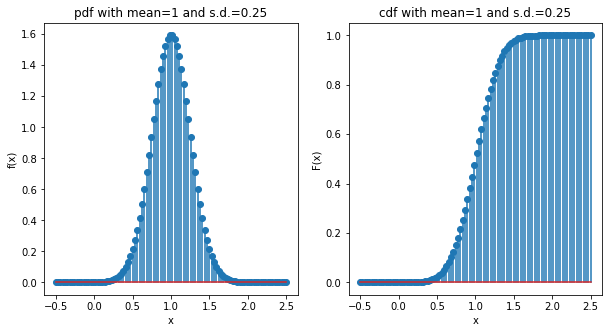

In [ ]:
mean, sd = 1, 0.25
x = np.linspace(mean - 6*sd, mean + 6*sd, 100)
f = st.norm.pdf(x=x, loc=mean, scale=sd)
F = st.norm.cdf(x=x, loc=mean, scale=sd)

pl.figure(figsize=(10,5))
pl.subplot(121)
pl.stem(x, f); pl.xlabel('x'); pl.ylabel('f(x)'); pl.title('pdf with mean={} and s.d.={}'.format(mean, sd))
pl.subplot(122)
pl.stem(x, F); pl.xlabel('x'); pl.ylabel('F(x)'); pl.title('cdf with mean={} and s.d.={}'.format(mean, sd))
pl.show()

## 1.2 Discrete random variables

**Exercise 1.2.1** In an urn which contains M=100 different currency bills, n=25 bills are Australian dollars. Plot the pmf and cdf if N=15 bills are randomly drawn *without replacement*.

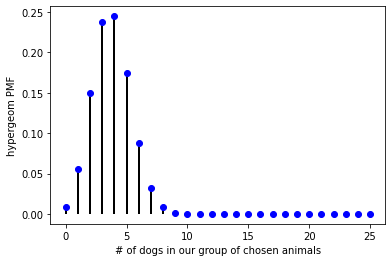

In [ ]:
#Answer
#referenced: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.hypergeom.html referenced
from scipy.stats import hypergeom
M, n, N = 100, 25, 15 #Population, Successes, No of draws
x = np.arange(0, n+1)
rvs = hypergeom(M, n, N)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


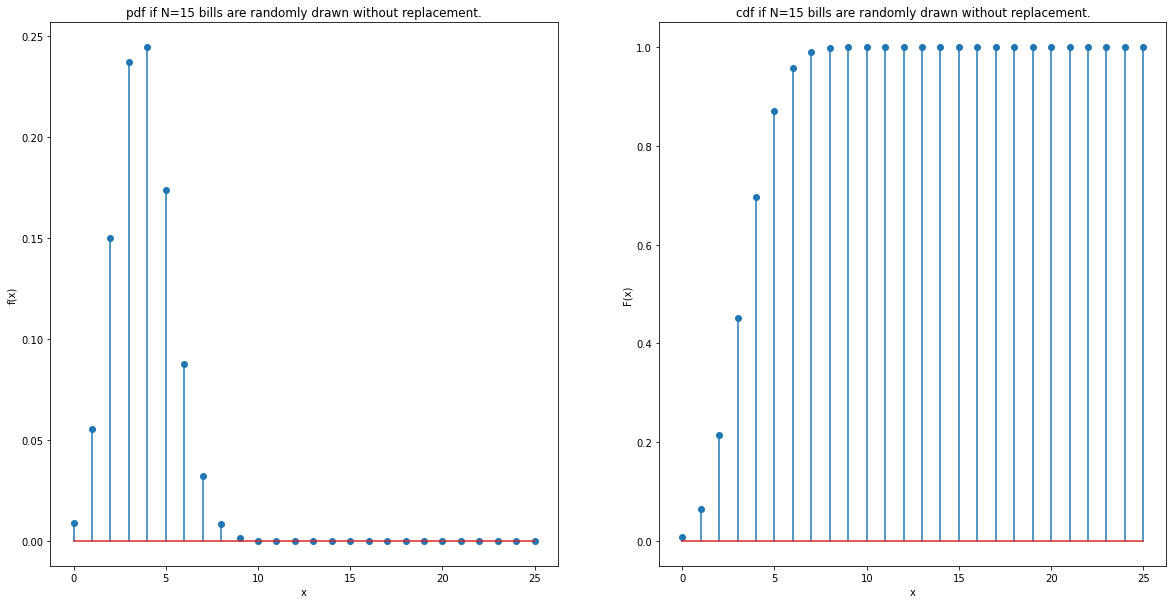

In [ ]:
pmf_aud_bills = rvs.pmf(x)
cdf_aud_bills = rvs.cdf(x)

pl.figure(figsize=(20,10))
pl.subplot(121)
pl.stem(x, pmf_aud_bills); pl.xlabel('x'); pl.ylabel('f(x)'); pl.title('pdf if N=15 bills are randomly drawn without replacement.')
pl.subplot(122)
pl.stem(x, cdf_aud_bills); pl.xlabel('x'); pl.ylabel('F(x)'); pl.title('cdf if N=15 bills are randomly drawn without replacement.')
pl.show()


#2. Sampling

## 2.1 Pseudo-random number generators (PRNG)

**Exercise 2.1.1** Discuss how random numbers are generated in a computer (Turing machine). 

    Answer:

## 2.2 Sampling from a distribution

Normal distribution

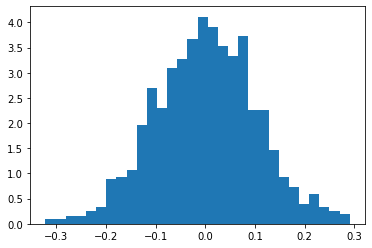

In [ ]:
mu, sigma = 0, 0.1 # mean and standard deviation
samples = np.random.normal(mu, sigma, 1000) # or use scipy.stats.rvs(size=1000)

count, bins, ignored = pl.hist(samples, bins=30, density=True)
pl.show()

Multivaraiate normal

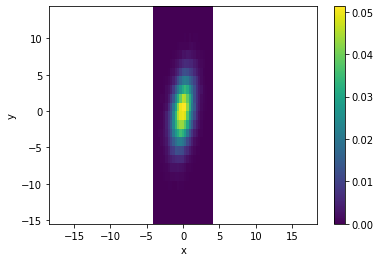

In [ ]:
mean = (0, 0)
cov = [[1, 1], [1, 10]]
x, y = np.random.multivariate_normal(mean, cov, 100000).T

#pl.scatter(x, y)
pl.hist2d(x, y, 25, density=True) #hexbin
pl.xlabel('x'); pl.ylabel('y')
pl.colorbar()
pl.axis('equal')
pl.show()
del x, y


**Exercise 2.2.1** Observe the probability distribution by varying mean and covariance.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


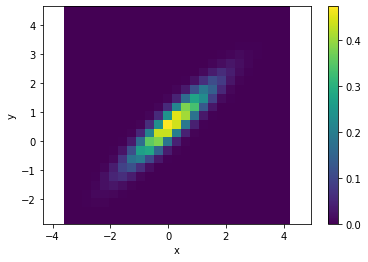

In [ ]:
mean = (np.random.random(1)[0], np.random.random(1)[0])
cov = [np.random.random(2), np.random.random(2)]
x, y = np.random.multivariate_normal(mean, cov, 100000).T

#pl.scatter(x, y)
pl.hist2d(x, y, 25, density=True) #hexbin
pl.xlabel('x'); pl.ylabel('y')
pl.colorbar()
pl.axis('equal')
pl.show()
del x, y

# 3. Information Theory

## 3.1 Entropy 

Entropy is a measure of uncertainty.
\begin{equation}
    \mathrm{H}[x] := \sum_x p(x)log_n \frac{1}{p(x)} = -\sum_x p(x)log_n \big( p(x) \big)
\end{equation}

If n=2, the unit of measurement is in bits.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of in

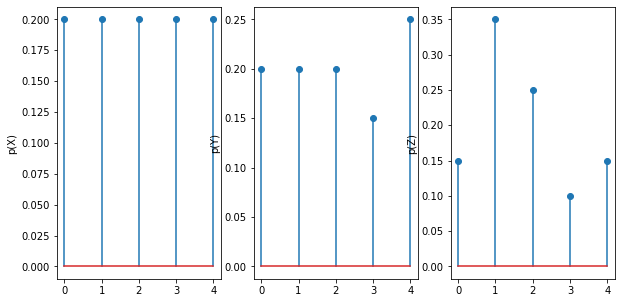

1.0 0.9921503172858167 0.9403319177008926


In [ ]:
#Observe how Entropy changes with the spread of data 
X = np.arange(5)
Z = Y = X 

pX = np.array([ 0.2, 0.2, 0.2, 0.2, 0.2])
pY = np.array([ 0.2, 0.2, 0.2, 0.15, 0.25])
pZ = np.array([ 0.15, 0.35, 0.25, 0.1, 0.15])

pl.figure(figsize=(10,5))
pl.subplot(131)
pl.stem(X, pX) 
pl.ylabel('p(X)')

pl.subplot(132)
pl.stem(Y, pY)
pl.ylabel('p(Y)')

pl.subplot(133)
pl.stem(Z, pZ)
pl.ylabel('p(Z)')

pl.show()

def calc_entropy(p):
    return -np.sum(p * np.log(p)/np.log(len(p)))

print(calc_entropy(pX), calc_entropy(pY), calc_entropy(pZ))

**Exercise 3.1.1** Consider the Bernoulli trial of tossing a coin (unfair coin) with event space X. Let $p(X=1)$ be the probability of obtaining a head. Calculate the entopy for $p(X=1) \in [0,1]$ and show that entopy decreases as the uncertainty decreases.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 0, 'probability of tossing head')

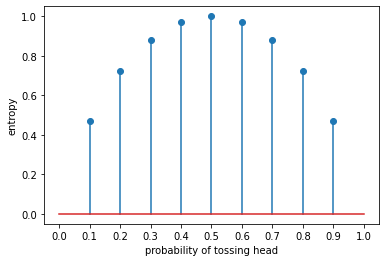

In [ ]:
#Answer
entropy_X = []
for prob in range(0, 11):
  pX = np.array([prob/10, 1-prob/10])
  entropy_X.append(calc_entropy(pX))

X = np.arange(0,1.1,0.1)
pl.plot(1)
pl.xticks(X)
pl.stem(X, entropy_X) 
pl.ylabel('entropy')
pl.xlabel('probability of tossing head')

## 3.2 Kullback-Leibler (KL) divergence or Relative Entropy

KL divergence measures how dissimilar two probability distributions are.
\begin{equation}
    \mathrm{KL}(p||q) := \sum_x p(x) log_n \frac{p(x)}{q(x)}
\end{equation}

In [ ]:
def calc_KL(p, q):
    return np.sum(pX * (np.log(p/q)/np.log(len(p))))

print('KL(p||p)', calc_KL(pX, pX)) #Note min(KL) is zero when iff p=q
print('KL(p||q)', calc_KL(pX, pY))
print('KL(q||p)', calc_KL(pY, pX)) # Note KL is not symmetric

KL(p||p) 0.0
KL(p||q) 0.008020007561517398
KL(q||p) -0.008020007561517398


## 4. Bayes' Rule

\begin{equation}
    p(Y=y|X=x) = \frac{p(X=x|Y=y) p(Y=y)}{\sum_{y'} p(X=x|Y=y')p(Y=y')}
\end{equation}

**Exercise 4.1.1** 

0.4% of a population is having a particular genetic disorder. In order to test the disorder, a person has undergone a medical test which has a **sensitivity** of 80% (if a person has the disorder, the test result will be positive with a probability of 0.8) and a **false alarm** of 10%. If the test is positive, what is the probability of person the having the particular genetic disorder?

In [ ]:
pX = 0.4
pY_X = 0.8
pY_notX = 0.1
pY_X = (pX * pY_X) / ((pX * pY_X) + (1- pX) * pY_notX)
print("The probability of person the having the particular genetic disorder, given the test is positive is:", pY_X)


The probability of person the having the particular genetic disorder, given the test is positive is: 0.8421052631578948
